# Medical Insurance Cost Prediction Project


Health insurance company can only make money if it collects more than it spends on the medical care of its beneficiaries. On the other hand, even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients.

The objective of this project is to accurately predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc.

# Importing dependencies

In [1]:
#importing Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Data collection and Analysis

In [2]:
# loading the data from csv file
ins_data = pd.read_csv(r"D:\Datasets\insurance.csv")

In [3]:
#printing first 5 rows of dataset
ins_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# checking number of rows and columns
ins_data.shape

(1338, 7)

In [5]:
# info of dataset
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
> Sex
> Smoker
> Region

In [6]:
# checking missing values
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [7]:
# Statistical measures of dataset
ins_data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


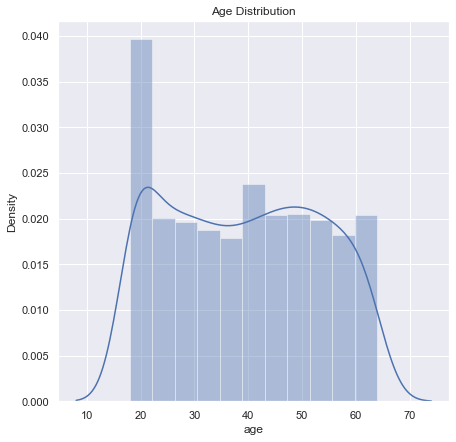

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(ins_data['age'])
plt.title('Age Distribution')
plt.show()

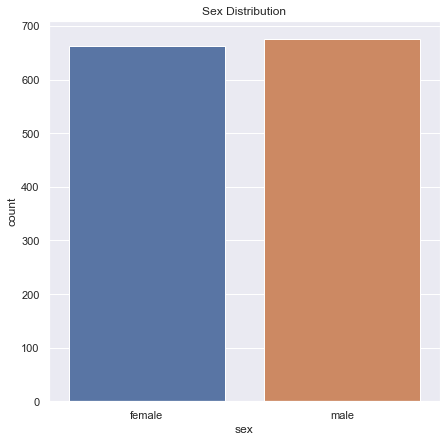

In [9]:
# Gender column
plt.figure(figsize=(7,7))
sns.countplot(x ='sex', data=ins_data)
plt.title("Sex Distribution")
plt.show()

In [10]:
#check total no.s of values
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

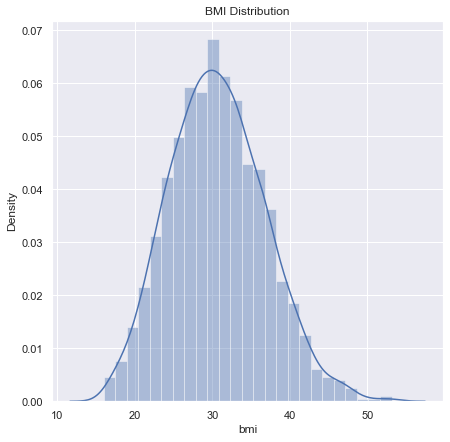

In [11]:
# BMI distribution
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(ins_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range --> 18.5 to 24.9

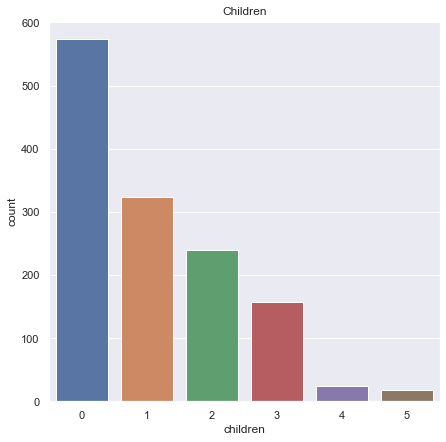

In [12]:
#children column
plt.figure(figsize= (7,7))
sns.countplot(x = 'children',data =ins_data)
plt.title('Children')
plt.show()

In [13]:
ins_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

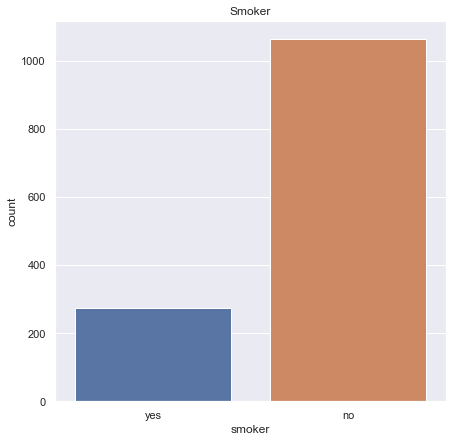

In [14]:
# smoker column
plt.figure(figsize =(7,7))
sns.countplot(x='smoker',data=ins_data)
plt.title('Smoker')
plt.show()

In [15]:
ins_data['smoker'].value_counts()  #see exact value counts

no     1064
yes     274
Name: smoker, dtype: int64

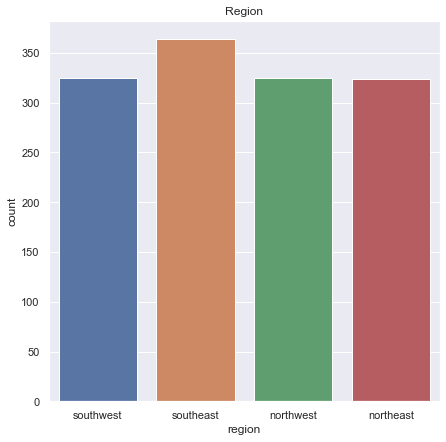

In [16]:
# Region column
plt.figure(figsize=(7,7))
sns.countplot(x='region',data=ins_data)
plt.title('Region')
plt.show()

In [17]:
ins_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

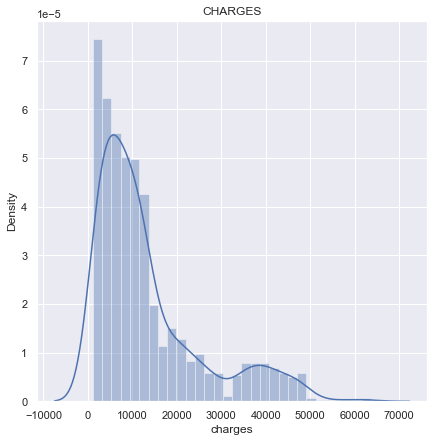

In [18]:
# Charges column
plt.figure(figsize=(7,7))
sns.distplot(ins_data['charges'])
plt.title('CHARGES')
plt.show()

# Data Preprocessing

Encoding the categorical features

In [19]:
# encoding sex column
ins_data.replace({'sex':{'male' : 0,'female': 1}},inplace =True)

# encoding smoker column
ins_data.replace({'smoker':{'yes' : 1 , 'no' : 0}},inplace = True)

# encoding region column
ins_data.replace({'region':{'southeast':0, 'southwest': 1, 'northeast': 2,
                          'northwest': 3}}, inplace = True)

#### Splitting the features and target

In [20]:
x = ins_data.drop(columns = 'charges', axis = 1)
y = ins_data['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


>>> Spliting the data into Training data & Testing Data

In [23]:
x_train, x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


# Model Training
>>> LINEAR REGRESSION

In [26]:
# Loading linear regression model
regressor = LinearRegression()

In [27]:
regressor.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [28]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [29]:
# R squared value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.751505643411174


In [30]:
# prediction on testing data
test_data_prediction = regressor.predict(x_test)

In [31]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value: ',r2_test)

R squared value:  0.7447273869684076


# Building a Predictive System

In [32]:
input_data = (31,1,25.740,0,0,0)

#changing input_data to numpy array
input_data_as_numpy_array = np.array(input_data)

#reshaping array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496046
